In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the data

data = pd.read_csv(r'C:\Users\Administrator\Desktop\DATA\Python Test Data\HR_comma_sep.csv')

In [3]:
data.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,left,promotion_last_5years,role,salary
0,0.53,2,157,3,0,0.38,1,0,sales,low
1,0.86,5,262,6,0,0.80,1,0,sales,medium
2,0.88,7,272,4,0,0.11,1,0,sales,medium
3,0.87,5,223,5,0,0.72,1,0,sales,low
4,0.52,2,159,3,0,0.37,1,0,sales,low


In [4]:
print(data.groupby('role').size())
print('\n')
print(data.groupby('salary').size())

role
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64


salary
high      1237
low       7316
medium    6446
dtype: int64


In [5]:
#information

print(data.info())
print('\n')
print(data.isnull().sum())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
satisfaction_level       14999 non-null float64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
role                     14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
satisfaction_level       0
left                     0
promotion_last_5years    0
role                     0
salary                   0
dtype: int64




In [6]:
print(data.describe())

       last_evaluation  number_project  average_montly_hours  \
count     14999.000000    14999.000000          14999.000000   
mean          0.716102        3.803054            201.050337   
std           0.171169        1.232592             49.943099   
min           0.360000        2.000000             96.000000   
25%           0.560000        3.000000            156.000000   
50%           0.720000        4.000000            200.000000   
75%           0.870000        5.000000            245.000000   
max           1.000000        7.000000            310.000000   

       time_spend_company  Work_accident  satisfaction_level          left  \
count        14999.000000   14999.000000        14999.000000  14999.000000   
mean             3.498233       0.144610            0.612834      0.238083   
std              1.460136       0.351719            0.248631      0.425924   
min              2.000000       0.000000            0.090000      0.000000   
25%              3.000000       0

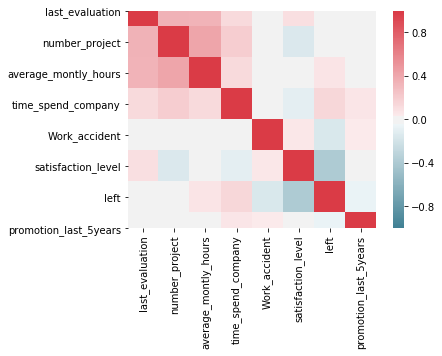

In [7]:
#checking correlation

correlation = data.corr()
ax = sns.heatmap(correlation , vmin=-1, vmax = 1, center =0, square = True, cmap= sns.diverging_palette(220, 10, as_cmap = True))

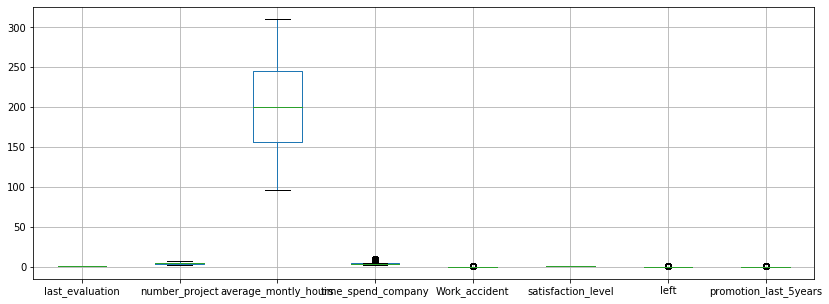

In [8]:
#detecting outliers

data.boxplot(figsize=[14,5])

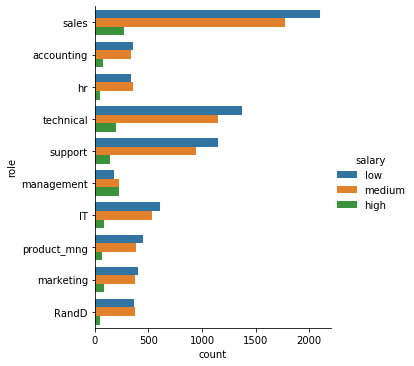

In [9]:
#inspecting
sns.catplot( y = 'role',hue = 'salary',  data = data, kind = 'count')
plt.figsize=  [14,6]

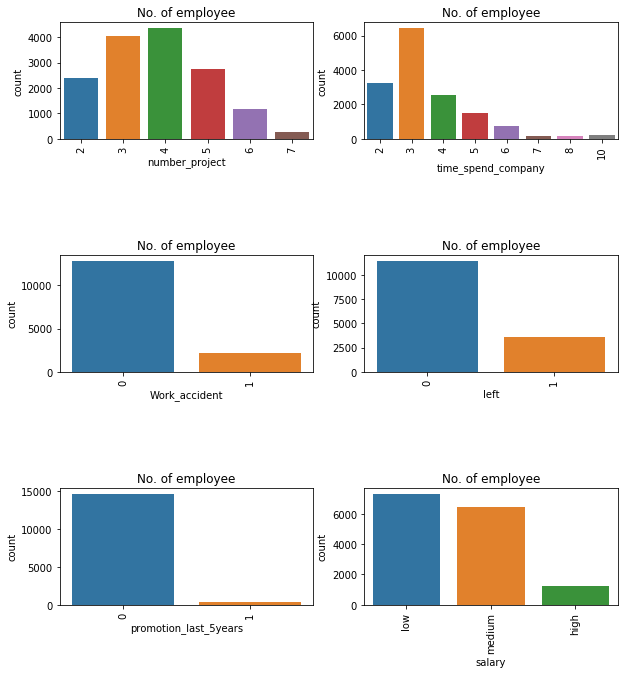

In [10]:
# plotting subplots

features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

# Notable Insights from the data


In [11]:
# Most of the emplyees receive a salaries ranging between 'Medium' and 'Low'.
# Major section of the employees haven't received a promotion in the last 5 years.
# The number of employees remaining is approximately a -third of the total.
# Emplyees mostly stick around the company for 3 years.
# Number of projects undertaken by employees is around 3-4.


In [12]:
X = data[["last_evaluation",'number_project','average_montly_hours','time_spend_company','Work_accident','satisfaction_level',
         'promotion_last_5years','salary']]
y = data[['left']].values

In [13]:
#flattenning the y 

y = y.flatten()

In [14]:
#getting dummy variables
a = X[['salary']]
dummy = pd.get_dummies(a)
dummy

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [15]:
#combining the two
df = pd.concat([data , dummy] , axis = 1)

In [16]:
df.drop(['salary', 'role'] , axis = 1, inplace = True)

In [17]:
df

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.53,2,157,3,0,0.38,1,0,0,1,0
1,0.86,5,262,6,0,0.80,1,0,0,0,1
2,0.88,7,272,4,0,0.11,1,0,0,0,1
3,0.87,5,223,5,0,0.72,1,0,0,1,0
4,0.52,2,159,3,0,0.37,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.57,2,151,3,0,0.40,1,0,0,1,0
14995,0.48,2,160,3,0,0.37,1,0,0,1,0
14996,0.53,2,143,3,0,0.37,1,0,0,1,0
14997,0.96,6,280,4,0,0.11,1,0,0,1,0


In [18]:
#storing values
Xt = df.values

In [19]:
# importing regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as a_s
from sklearn.metrics import confusion_matrix as cm

X_train , X_test, y_train , y_test = train_test_split(Xt, y , test_size = 0.3)


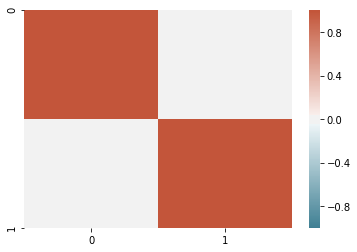

In [25]:
#Logistic

logreg = LogisticRegression(solver = 'liblinear')

logreg.fit(X_train , y_train )

y_linear_pred  = logreg.predict( X_test)

res_linear = a_s(y_test , y_linear_pred)

cm_linear = cm(y_test , y_linear_pred)

sns.heatmap( cm_linear , vmin = -1 , vmax = 1 , center = 0 , cmap = sns.diverging_palette(220 ,20, as_cmap = True))

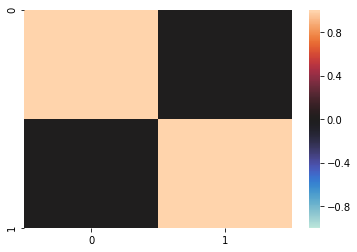

In [27]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 3)

tree.fit(X_train , y_train)

y_tree_pred = tree.predict(X_test)

res_tree = a_s(y_test, y_tree_pred)

cm_tree = cm(y_test , y_tree_pred)

sns.heatmap(cm_tree , vmin = -1, vmax = 1, center = 0)

In [28]:
#printing results

print(f'Logistic: {res_linear}')
print('\n')
print(f'Tree: {res_tree}')
print('\n')

Logistic: 1.0


Tree: 1.0




In [ ]:
# both the classifiers have given a result of classification as 100% based on the hyperparameters.